In [21]:
import sumolib
import sumolib.visualization

import pandas as pd

import matplotlib.pyplot as plt

In [22]:
import xml.etree.ElementTree as ET
tree = ET.parse("InTAS_001.rou.xml")
root = tree.getroot()

In [23]:
routes = []

for vehicle in root.findall("vehicle"):
    for rd in vehicle.findall("routeDistribution"):
        for route in rd.findall("route"):
            routes.append(route.get("edges"))

In [24]:
net = sumolib.net.readNet("ingolstadt.net.xml")

In [25]:
edge_list = net.getEdges()

In [26]:
class Options:
    def __init__(self):
        pass

options = Options()
options.defaultWidth = 1.0
options.defaultColor = "#000000"
options.linestyle = "-"

## Plot a route:

In [27]:
def plot_the_route(net, route, edge_list):
    colors = {}
    widths = {}
    route_edges = route.split(" ")
    for edge in edge_list:
        edge_id = edge.getID()
        widths[edge_id] = 2 if edge_id in route_edges else 0
        colors[edge_id] = "#FFFFFF" if edge_id in route_edges else "#000000" #white->part of route, black->otherwise
    
    fig, ax = plt.subplots(1,1, figsize=(12,12))
    ax.set_facecolor("black")
    sumolib.visualization.helpers.plotNet(net, colors, widths, options)
    ax.set_aspect("equal", None, 'C')
    
    #hide other shits (source: https://stackoverflow.com/questions/2176424/hiding-axis-text-in-matplotlib-plots)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # X AXIS -BORDER
    ax.spines['bottom'].set_visible(False)
    # BLUE
    ax.set_xticklabels([])
    # RED
    ax.set_xticks([])
    # RED AND BLUE TOGETHER
    ax.axes.get_xaxis().set_visible(False)

    # Y AXIS -BORDER
    ax.spines['left'].set_visible(False)
    # YELLOW
    ax.set_yticklabels([])
    # GREEN
    ax.set_yticks([])
    # YELLOW AND GREEN TOGHETHER
    ax.axes.get_yaxis().set_visible(False)
    
    return fig, ax


In [28]:
plot_the_route(net, routes[40], edge_list)

(<Figure size 1200x1200 with 1 Axes>, <Axes: >)

## Plot the map:

In [29]:
def plot_the_map(net, edge_list):
    colors = {}
    widths = {}
    for edge in edge_list:
        edge_id = edge.getID()
        widths[edge_id] = 1
        colors[edge_id] = "#FF0000"
    
    fig, ax = plt.subplots(1,1, figsize=(12,12))
    ax.set_facecolor("black")
    sumolib.visualization.helpers.plotNet(net, colors, widths, options)
    ax.set_aspect("equal", None, 'C')
    
    #hide other shits (source: https://stackoverflow.com/questions/2176424/hiding-axis-text-in-matplotlib-plots)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # X AXIS -BORDER
    ax.spines['bottom'].set_visible(False)
    # BLUE
    ax.set_xticklabels([])
    # RED
    ax.set_xticks([])
    # RED AND BLUE TOGETHER
    ax.axes.get_xaxis().set_visible(False)

    # Y AXIS -BORDER
    ax.spines['left'].set_visible(False)
    # YELLOW
    ax.set_yticklabels([])
    # GREEN
    ax.set_yticks([])
    # YELLOW AND GREEN TOGHETHER
    ax.axes.get_yaxis().set_visible(False)
    
    return fig, ax


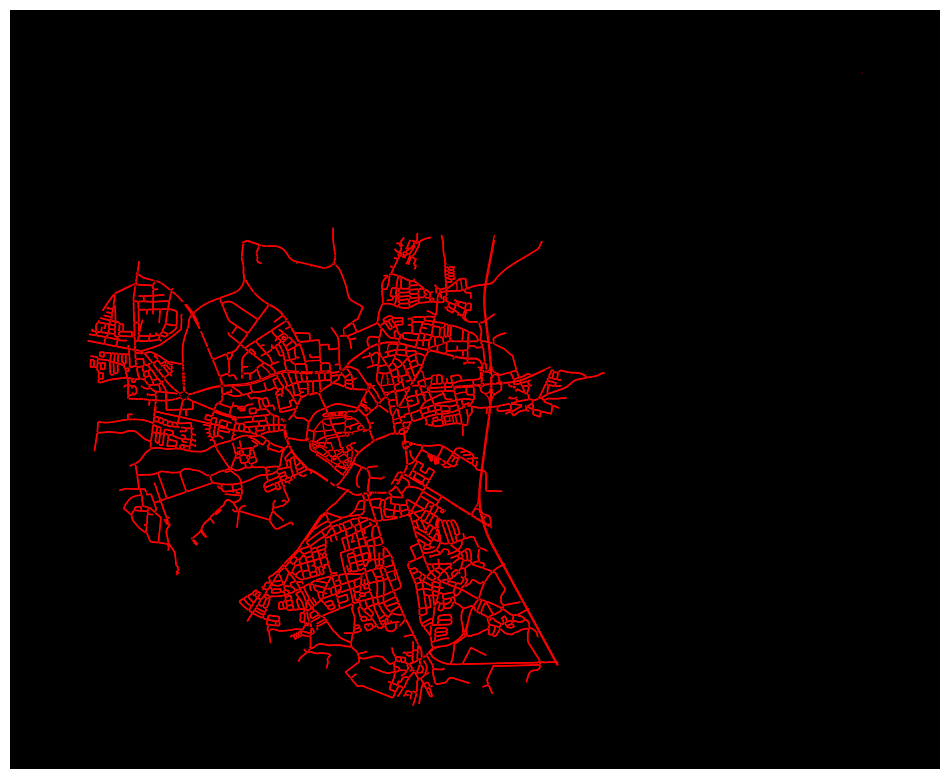

In [30]:
a,b =plot_the_map(net, edge_list)
a

In [31]:
import matplotlib
import matplotlib.pyplot as plt
import os
import sumolib.visualization.helpers

# Use 'Agg' backend to avoid rendering
matplotlib.use('Agg')

def save_the_map(net, edge_list, folder_name, file_name):
    colors = {}
    widths = {}
    for edge in edge_list:
        edge_id = edge.getID()
        widths[edge_id] = 2
        colors[edge_id] = "#FF0000"
    
    fig, ax = plt.subplots(1,1, figsize=(12,12))
    ax.set_facecolor("black")
    sumolib.visualization.helpers.plotNet(net, colors, widths, options)
    ax.set_aspect("equal", None, 'C')
    
    #hide other shits (source: https://stackoverflow.com/questions/2176424/hiding-axis-text-in-matplotlib-plots)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # X AXIS -BORDER
    ax.spines['bottom'].set_visible(False)
    # BLUE
    ax.set_xticklabels([])
    # RED
    ax.set_xticks([])
    # RED AND BLUE TOGETHER
    ax.axes.get_xaxis().set_visible(False)

    # Y AXIS -BORDER
    ax.spines['left'].set_visible(False)
    # YELLOW
    ax.set_yticklabels([])
    # GREEN
    ax.set_yticks([])
    # YELLOW AND GREEN TOGHETHER
    ax.axes.get_yaxis().set_visible(False)

    # Create the folder if it doesn't exist
    os.makedirs(folder_name, exist_ok=True)
    
    # Save the figure in the folder
    file_path = os.path.join(folder_name, file_name)
    fig.savefig(file_path, bbox_inches='tight', pad_inches=0)
    plt.close(fig)  # Close the figure to free memory

    return file_path

In [32]:
folder_name = 'map_plot'

save_the_map(net, edge_list, folder_name, f"{folder_name}.png")

'map_plot\\map_plot_slim.png'